# EFFETTO EKMAN

FIOR GIULIA  
09/03/2024  
Esame di Tecniche di Rappresentazione e Modellizzazione Dati

TESTO D'ESAME  
Questo progetto si propone di applicare il modello di Ekman all'analisi delle correnti marine utilizzando i dati raccolti dalla boa oceanografica VIDA. Il modello di Ekman, sviluppato da Vagn Walfrid Ekman, descrive il flusso delle correnti marine sotto l'influenza combinata dello stress del vento sulla superficie dell'acqua e della forza di Coriolis, risultante dalla rotazione terrestre. Le correnti marine spiraleggiano con la profondità a causa della forza di Coriolis, creando la 'spirale di Ekman'.


### Preparazione e Analisi dei Dati
Si focalizzi l’analisi sull'evento di bora tra le 00:00 del 7/01/24 e le 23:59 del
9/01/24, per profondità tra i 2 e i 20 metri, in quanto la bora offre condizioni di
direzione e intensita' quasi costante garantendo un buona approssimazione per il
modello di Ekman.
Caricare e preparare i dati per l'analisi,
filtrando secondo i criteri specificati per l'evento di bora. Si suggerisce di
scaricare i dati in formato Excel ed analizzarli con il pacchetto pandas.
Graficare l’andamento medio delle correnti in funzione della profondita’ per
evidenziare la spirale di Ekman.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

I dati forniti da "Oceanographic Data and Measurements - Buoy 2" sono i seguenti:

In [2]:
#!pip install openpyxl

In [3]:
data0 = pd.read_excel('wind_waves_currents_20240107_000000_20240109_233000.xlsx')
data0

,Date and time,Mean Wind Speed,Mean Wind Direction,Waves mean height,Waves mean direction,CurrentE (2 m),CurrentN (2 m),CurrentE (3 m),CurrentN (3 m),CurrentE (4 m),...,CurrentE (16 m),CurrentN (16 m),CurrentE (17 m),CurrentN (17 m),CurrentE (18 m),CurrentN (18 m),CurrentE (19 m),CurrentN (19 m),CurrentE (20 m),CurrentN (20 m)
0,2024-01-07 00:00:00,13.7669,59.8344,0.961,44.56,13.6,3.7,10.6,2.8,14.4,...,-2.0,3.6,1.5,-1.9,7.7,3.5,0.3,5.6,-1.8,-0.3
1,2024-01-07 00:30:00,12.6352,57.1157,0.819,40.34,15.0,2.4,10.0,7.2,11.7,...,3.5,7.8,-0.4,5.6,1.1,6.9,0.2,5.1,-3.7,-1.7
2,2024-01-07 01:00:00,13.8131,52.7333,0.832,45.20,13.0,0.8,13.4,6.4,11.4,...,4.1,4.2,3.2,8.4,1.3,2.8,-0.9,5.3,-6.1,-1.1
3,2024-01-07 01:30:00,14.0673,53.2746,0.972,48.87,7.9,7.6,6.7,5.7,8.4,...,2.2,0.8,5.7,2.4,4.3,2.5,7.5,1.4,4.2,4.8
4,2024-01-07 02:00:00,11.6200,48.5875,0.867,53.78,6.7,4.9,6.3,7.7,6.0,...,2.7,9.4,3.8,11.3,3.2,10.6,-2.8,7.1,-1.9,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2024-01-09 21:30:00,10.0730,59.1227,1.067,61.85,10.6,10.5,16.4,9.1,16.0,...,16.9,2.5,18.1,8.1,19.0,0.0,15.7,-2.6,9.4,3.4
140,2024-01-09 22:00:00,9.7180,59.3673,0.985,50.95,14.2,6.6,17.7,7.1,18.7,...,10.7,5.2,16.9,5.9,15.1,4.2,1.7,1.4,4.0,-3.7
141,2024-01-09 22:30:00,11.1910,60.6077,0.988,53.97,14.3,6.5,15.3,6.0,14.4,...,16.0,5.0,15.2,4.6,15.8,5.2,11.1,-2.3,8.3,4.4
142,2024-01-09 23:00:00,10.9174,62.9378,0.910,47.63,13.1,0.6,15.7,0.5,15.5,...,14.2,2.9,14.7,6.4,14.5,1.3,9.4,2.6,3.9,3.4


Si consiglia di selezionare solo i dati entro una
deviazione standard dalla media di intensità e direzione del vento per garantire
uniformità nelle condizioni analizzate.

Si calcola quindi la media sul tempo dell'intensità e della direzione del vento attraverso le funzioni di numpy 'np.mean' e 'np.std', che rappresentano rispettivamente la media e la deviazione standard dei dati selezionati. Si definiscono in seguito, per entrambi, i limiti inferiori e superiori entro cui devono ricadere i dati al fine di ottenere l'uniformità richiesta. 

In [4]:
wind_int = data0['Mean Wind Speed'] #considero la colonna che rappresenta il vento medio misurato 
mean_wind_int = np.mean(wind_int) 
dst_wind_int = np.std(wind_int)
print('intensità vento')
print('media', mean_wind_int,' deviazione standard', dst_wind_int)
print('da', mean_wind_int-dst_wind_int,'a',mean_wind_int+dst_wind_int)
inf1 = mean_wind_int-dst_wind_int #definisco il limite inferiore
sup1 = mean_wind_int+dst_wind_int #definisco il limite superiore

wind_dir = data0['Mean Wind Direction'] #considero la colonna che rappresenta la direzione media del vento misurata
mean_wind_dir = np.mean(wind_dir)
dst_wind_dir = np.std(wind_dir)
print('direzione vento')
print('media', mean_wind_dir, 'deviazione standard',dst_wind_dir)
print('da', mean_wind_dir-dst_wind_dir,'a',mean_wind_dir+dst_wind_dir)
inf2 = mean_wind_dir-dst_wind_dir #definisco il limite inferiore
sup2 = mean_wind_dir+dst_wind_dir #definisco il limite superiore

intensità vento
media 12.873952291666667  deviazione standard 1.65797767180998
da 11.215974619856688 a 14.531929963476646
direzione vento
media 56.68826250000001 deviazione standard 5.610054524416592
da 51.07820797558342 a 62.2983170244166


In [5]:
#l'intersezione delle due condizioni, di direzione e intensità si possono scrivere come di seguito
data = data0[(data0['Mean Wind Speed']>= inf1) & (data0['Mean Wind Speed']<= sup1) & (data0['Mean Wind Direction']>= inf2) & (data0['Mean Wind Direction']<= sup2)]
data

,Date and time,Mean Wind Speed,Mean Wind Direction,Waves mean height,Waves mean direction,CurrentE (2 m),CurrentN (2 m),CurrentE (3 m),CurrentN (3 m),CurrentE (4 m),...,CurrentE (16 m),CurrentN (16 m),CurrentE (17 m),CurrentN (17 m),CurrentE (18 m),CurrentN (18 m),CurrentE (19 m),CurrentN (19 m),CurrentE (20 m),CurrentN (20 m)
0,2024-01-07 00:00:00,13.7669,59.8344,0.961,44.56,13.6,3.7,10.6,2.8,14.4,...,-2.0,3.6,1.5,-1.9,7.7,3.5,0.3,5.6,-1.8,-0.3
1,2024-01-07 00:30:00,12.6352,57.1157,0.819,40.34,15.0,2.4,10.0,7.2,11.7,...,3.5,7.8,-0.4,5.6,1.1,6.9,0.2,5.1,-3.7,-1.7
2,2024-01-07 01:00:00,13.8131,52.7333,0.832,45.20,13.0,0.8,13.4,6.4,11.4,...,4.1,4.2,3.2,8.4,1.3,2.8,-0.9,5.3,-6.1,-1.1
3,2024-01-07 01:30:00,14.0673,53.2746,0.972,48.87,7.9,7.6,6.7,5.7,8.4,...,2.2,0.8,5.7,2.4,4.3,2.5,7.5,1.4,4.2,4.8
5,2024-01-07 02:30:00,11.2371,53.3293,0.749,39.71,12.1,6.5,9.7,3.9,7.9,...,6.3,6.1,4.2,7.0,4.4,3.0,2.0,-1.9,2.4,-4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2024-01-09 16:00:00,14.1761,56.9525,0.995,52.48,8.1,14.8,8.6,15.9,5.6,...,6.8,13.5,6.6,13.4,1.0,14.3,2.5,11.0,-10.6,8.5
129,2024-01-09 16:30:00,13.9356,60.5521,1.014,61.62,8.5,16.8,11.0,16.3,8.2,...,2.9,16.1,2.6,15.2,4.0,13.8,6.5,14.1,-6.9,10.8
130,2024-01-09 17:00:00,12.5449,58.4656,0.903,53.03,7.3,11.4,9.1,12.9,10.5,...,6.1,13.6,1.8,18.8,4.3,15.7,3.2,10.5,-10.8,6.1
131,2024-01-09 17:30:00,12.1905,56.1501,0.954,50.05,6.9,11.1,11.8,11.9,8.7,...,9.5,15.9,11.1,15.8,7.6,12.7,7.6,9.1,-1.0,6.9


I dati sopra ottenuti rappresentano il set finale che costituirà il campione da analizzare. 
Per calcolare l'andamento medio delle correnti in funzione della profondità, si esegue una media temporale per ciascuna colonna del tipo "CurrentE, CurrentN". Si definisce quindi un array 'media_t' che rappresenti questi valori medi.  
Attraverso il ciclo for è possibile calcolare la media per ciascuna colonna interessata e inserire il valore nell'array 'media_t'.

In [6]:
# con len(data.columns) si considera il numero di colonne della tabella 'data'
# a cui si tolgono le prime 5 colonne che non sono d'interesse nell'operazione
media_t = np.zeros(len(data.columns)-5)
print(len(media_t)) # per ogni altezza sono presenti due coordiante  N/E (19*2)

for i in range(5,len(data.columns)):
    media_t[i-5] = np.mean(data.iloc[:,i]) 
# media_t[i-5] assegna correttamente i valori della media delle colonne di data a media_t, partendo dall'indice 0.
    
print(media_t)

38
[ -2.50149254   2.41343284  -2.29104478   2.65373134  -2.76119403
   2.2761194   -2.82985075   2.45671642  -3.17910448   2.98208955
  -3.32537313   2.39552239  -3.52686567   2.21343284  -3.32835821
   1.97164179  -3.75671642   1.75820896  -3.54626866   2.42089552
  -4.34626866   1.86716418  -4.54029851   2.10298507  -4.33432836
   1.22835821  -5.15522388   1.6119403   -5.1641791    1.20746269
  -5.66119403   1.66119403  -6.11940299   1.06567164  -6.85820896
   0.23283582 -11.94477612  -3.17910448]


Questo array rappresenta in modo alternato, similmente alla tabella _data_, le componenti delle velocità medie lungo est e nord. Allo scopo di distinguere le due direzioni, si definiscono 'componenti_est' le colonne pari di 'media_t' e 'componenti_nord' quelle dispari. Si crea inoltre un array '_profondità_' che descrive le altezze a cui vengono misurate le correnti a partire dal fondale marino attraverso la funzione _np.arange_. 

In [9]:
componenti_est = media_t[::2] #parte dalla colonna 0 con incremento di 2
componenti_nord = media_t[1::2] #parte dalla colonna 1 con incremento di 2
print('componenti_nord', componenti_nord)
print('componente est', componenti_est)

profondità = np.arange(2,21,1)
# l'estremo inferiore 2 è compreso, mentre quello superiore 21 non lo è, 1 indica l'incremento.
print("metri dal fondale marino" , profondità)

componenti_nord [ 2.41343284  2.65373134  2.2761194   2.45671642  2.98208955  2.39552239
  2.21343284  1.97164179  1.75820896  2.42089552  1.86716418  2.10298507
  1.22835821  1.6119403   1.20746269  1.66119403  1.06567164  0.23283582
 -3.17910448]
componente est [ -2.50149254  -2.29104478  -2.76119403  -2.82985075  -3.17910448
  -3.32537313  -3.52686567  -3.32835821  -3.75671642  -3.54626866
  -4.34626866  -4.54029851  -4.33432836  -5.15522388  -5.1641791
  -5.66119403  -6.11940299  -6.85820896 -11.94477612]
metri dal fondale marino [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


Per graficare i dati ottenuti, dopo aver definto l'intervallo di valori sulle ascisse e sulle ordinate, si usa _matplotlib.axes.Axes.quiver()_ dalla libreria di _matplotlib_ che permette di creare un grafico tridimensionale in grado di rappresentare dei vettori nello spazio.  _quiver()_ come argomenti richiede tre componenti spaziali che indicano la posizione nello spazio dei vettori, e 3 componenti che rappresentano invece il modulo del vettore da rappresentare; l'ultimo argomento imposta un rapporto grafico che serve per regolare la dimesione della punta della freccia in relazione alla sua lunghezza.

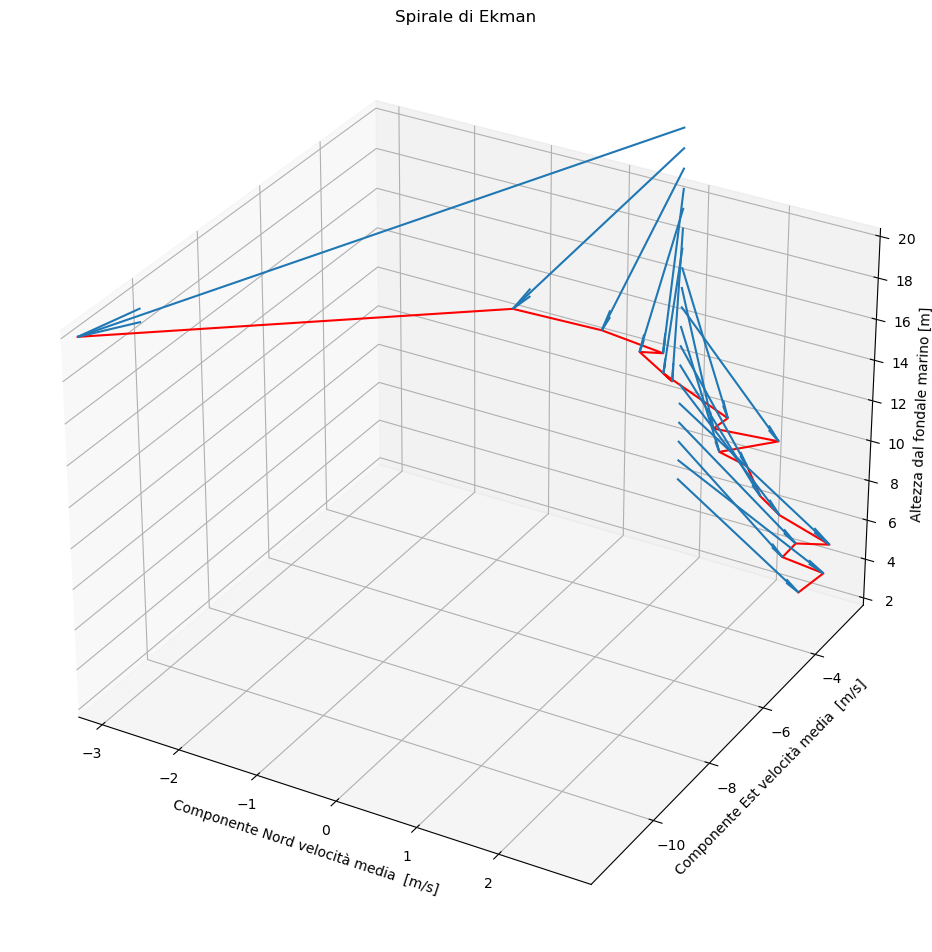

In [10]:
x = componenti_nord
y = componenti_est
z = profondità

# Creazione del grafico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([min(componenti_nord),max(componenti_nord)]) #definisco l'intervallo sulle ascisse
ax.set_ylim([min(componenti_est),max(componenti_est)]) #definisco l'intervallo sulle ordinate

# Attraverso 'quiver()' rappresento i dati sottoforma di vettori
ax.quiver(np.zeros_like(componenti_nord), np.zeros_like(componenti_est), profondità,
          componenti_nord, componenti_est, np.zeros_like(profondità),
          arrow_length_ratio=0.1)

# Plot della spirale che si forma congiungendo le punte dei vettori
ax.plot(x, y, z, c='red')

# Etichette degli assi
ax.set_xlabel('Componente Nord velocità media  [m/s]')
ax.set_ylabel('Componente Est velocità media  [m/s]')
ax.set_zlabel('Altezza dal fondale marino [m]',labelpad=1)

# Regola lo spazio intorno al riquadro del grafico
plt.subplots_adjust(left=0.1, right=3, top=2, bottom=0.1)

# Titolo e plot
plt.title('Spirale di Ekman')
plt.show()

Il grafico sopra, con le sue dimensioni, rende possibile scorgere con più precisione i vettori che altrimenti non sarebbero così visibili a causa della prospettiva. Si può notare che nel complesso i dati disegnano nello spazio una spirale di Ekman, nonostante alcune imprecisioni misurate più in profondità.  
Inoltre, è possibile graficare gli stessi dati anche in un piano bidimensionale, dove l'ascissa è rappresentata dai valori della velocità media in direzione Nord, l'ordinata mostra invece i valori nella direzione Est e si evidenziano le varie profondità attraverso una barra di colore. Quest'ultima ha una variazione di colore che dipende dall'altezza dove è stata effettuata la misura: il colore blu è in prossimità del fondale marino, mentre il giallo rappresenta la vicinanza al livello del mare.

Text(0.5, 1.0, 'Dati osservati')

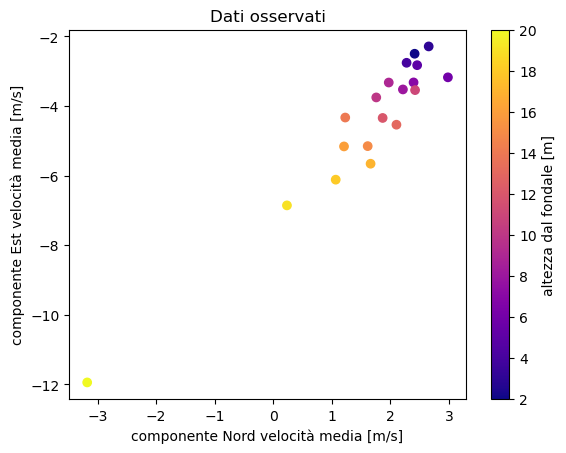

In [13]:
fig1 = plt.scatter(x,y,c=z,cmap='plasma')
plt.colorbar(label='altezza dal fondale [m]')
plt.xlabel('componente Nord velocità media [m/s]')
plt.ylabel('componente Est velocità media [m/s]')
plt.title('Dati osservati')

Dall'osservazione dei dati e con l'aiuto dei grafici è possibile notare come ad altezze prossime alla superficie i vettori abbiano un modulo più grande rispetto ai vettori che si trovano in prossimità del fondale marino. Questo accade perchè il vento agisce maggiormente sulle correnti presenti negli strati superficiali; il loro movimento comporta un effetto simile sugli strati sottostanti, fino ad arrivare in prossimità del fondale, dove la velocità delle correnti in modulo risulta essere inferiore. 

### Implementazione del modello
Le componenti est (u) e nord (v) della velocità delle correnti marine osservate alla profondita’ _z_ sono descritte nel modello di Ekman secondo le seguenti equazioni:
$$
u(z)= ug + \sqrt{2}/(\rho*f*d)*e^{z/d}*(Tx*\cos{(z/d -\phi)} -Ty*\sin{(z/d-\phi)})
$$
$$
v(z)= vg + \sqrt{2}/(\rho*f*d)*e^{z/d}*(Tx*\sin{(z/d -\phi)} +Ty*\cos{(z/d-\phi)})
$$  
Dove $f = 2Ω\sin{φ}$ rappresenta il parametro di coriolis e dipende dalla velocità di rotazione della Terra (Ω = 7,2921 × 10−5 rad/s) e dalla latitudine φ (45.55 deg), ρ la densita’ dell’acqua del mare in kg/m3, _ug_ e _vg_ le componenti di velocita’ per _z_ →-∞, _d_ la profondita’ dello strato di Ekman, Φ l’angolo tra la corrente superficiale e la direzione del vento, e _Tx_ e _Ty_ le componenti dello stress superficiale del campo del vento, date da $Tx = 𝛕\cos{\theta}$  e $Ty = 𝛕\sin{\theta}$ con $\theta$ direzione del vento.


Si applichino le equazioni del modello di Ekman in funzione dei parametri (𝛕, d, Φ, ug, vg). Verificare che per valori caratteristici (e.g., 𝛕 = -8 , d = 16, phi = -0.55 rad, ug e vg = -1., -6) si ottiene una spirale di Ekman.

Nelle costanti del modello è prevista la densità dell'acqua marina $\rho$, che è stata stimata considerando un valore medio per l'acqua della zona dell'Adriatico dove è situato l'esperimento, e la direzione del vento $\theta$, ricavata dalla media dei valori misurati durante l'evento di bora indicato. Le costanti sono quindi le seguenti:

In [14]:
rho = 1025 #densità dell'acqua [kg/m^3]
omega = 7.2921*(10**(-5)) # valocità di rotazione della Terra [rad/s]
psi_deg = 45.55 #gradi della latitudine
psi_rad = np.radians(psi_deg)
f = 2*omega*np.sin(psi_rad)
theta = np.mean(data['Mean Wind Direction'])

I valori caratteristici dei parametri sono invece:

In [15]:
tau = -8.0
d = 16.0
phi = -0.55 #radianti
ug = -1.0
vg = -6.0

#quindi posso definire l'ultima grandezza T, lo stress superficiale del vento
Tx = tau*np.cos(theta)
Ty = tau*np.sin(theta)

Si inseriscono ora i valori dei vari parametri all'interno delle equazioni che descrivono il modello. Le componenti est _u_ e nord _v_ della velocità delle correnti dipendono dall'altezza a cui vengono misurate. Avendo a disposizione 19 diverse altezze, dai 2 ai 20 m, queste componenti saranno degli array della stessa dimensione del vettore profondità definito precedentmente. 

In [17]:
u = ug + np.sqrt(2)/(rho*f*d) * np.exp(z/d)*(Tx*np.cos(z/d -phi)-Ty*np.sin(z/d - phi))
v = vg + np.sqrt(2)/(rho*f*d) * np.exp(z/d)*(Tx*np.sin(z/d -phi)+Ty*np.cos(z/d - phi))

print("u",u)
print("v",v)
print(Tx,Ty)
modulo = np.sqrt(u**2 + v**2)
print(modulo) # per verificare l'andamento in relazione alla profondità

u [-4.47338394 -4.24758585 -3.96471499 -3.61952467 -3.20658786 -2.72031838
 -2.15499607 -1.50479661 -0.76382602  0.07383955  1.01410855  2.06282286
  3.2257003   4.50827062  5.91580442  7.45323482  9.12507153 10.93530694
 12.88731404]
v [-12.65677499 -13.30320151 -13.97496265 -14.66984505 -15.38514839
 -16.11764296 -16.86352606 -17.6183773  -18.37711317 -19.13394098
 -19.88231262 -20.61487843 -21.32344161 -21.99891356 -22.63127079
 -23.20951371 -23.72162821 -24.15455047 -24.49413582]
-7.321332023231288 -3.2246081010888825
[13.42404995 13.96485432 14.52647741 15.1097754  15.71575632 16.34559717
 17.00066232 17.68252334 18.39298015 19.13408346 19.90815841 20.7178293
 21.56604517 22.45610612 23.39168997 24.37687913 25.41618727 26.51458554
 27.67752794]


Anche in questo caso è stato utilizzato _matplotlib.axes.Axes.quiver()_ al fine di rappresentare i vettori in uno spazio tridimensionale. Sull'asse delle ascisse è presente la componente Nord _v(z)_, su quello delle ordinate la componente Est _u(z)_ e sull'asse z il vettore profondità introdotto precedentemente.

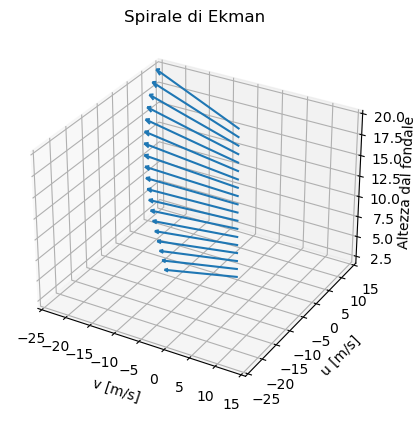

In [41]:
x = v
y = u
z = profondità

# Creare il grafico tridimensionale
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Impostare lo stesso range di valori per gli assi che definiscono il piano xy
ax.set_xlim([-25,15]) 
ax.set_ylim([-25,15])

# Plot dei vettori singoli
# in questo caso gli array di zeri sono stati costruiti in somiglianza a profondità piuttosto che a u e v,
# ma entrambi i metodi sono equivalenti in quanto u,v,z hanno la stessa dimensione
ax.quiver(np.zeros_like(profondità), np.zeros_like(profondità), profondità,
          v, u, np.zeros_like(profondità),arrow_length_ratio=0.05)

# Etichette degli assi
ax.set_xlabel('v [m/s]')
ax.set_ylabel('u [m/s]')
ax.set_zlabel('Altezza dal fondale',labelpad=0.3,rotation=90)
# Regola lo spazio intorno al riquadro del grafico
plt.subplots_adjust()
# Titolo del grafico
plt.title('Spirale di Ekman')

# Mostra il grafico
plt.show()

Nel grafico soprastante risulta più difficile riuscire a individuare la spirale di Ekman, ma è interessante perchè permette anche in questo caso di vedere una rotazione. Inoltre a differenza del grafico precedente, le componenti variano uniformemente e non vi sono vettori imprecisi.  
Similmente a quanto fatto nel punto precedente, nel caso di un grafico bidimensionale dove le ascisse sono rappresentate da _v_, le ordinate da _u_, è possibile identificare l'altezza dal fondale attraverso la barra di colore.

Text(0.5, 1.0, 'Spirale di Ekman')

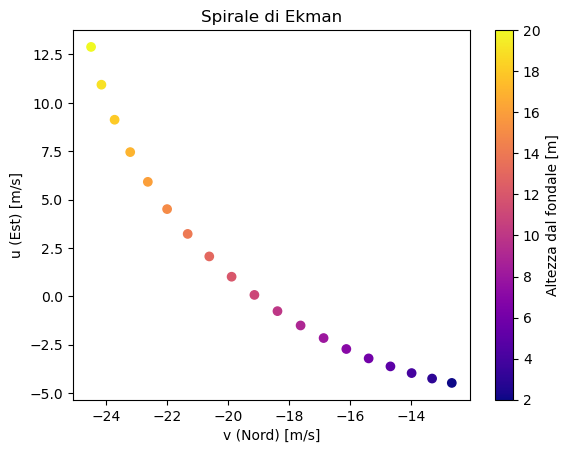

In [42]:
fig2 = plt.scatter(v,u,c=profondità,cmap='plasma')
plt.colorbar(label='Altezza dal fondale [m]')
plt.xlabel('v (Nord) [m/s]')
plt.ylabel('u (Est) [m/s]')
plt.title('Spirale di Ekman')

In questo grafico si può apprezzare il variare delle componenti, inoltre esso conferma l'ipotesi fatta precedentemente secondo la quale si ha una graduale rotazione e variazione del modulo dei vettori. Nonostante questo, a causa degli assi è difficile intravedere una spirale perciò, imponendo gli intervalli degli assi uguali ed evidenziando gli assi passanti per l'origine, si ottiene il seguente plot:

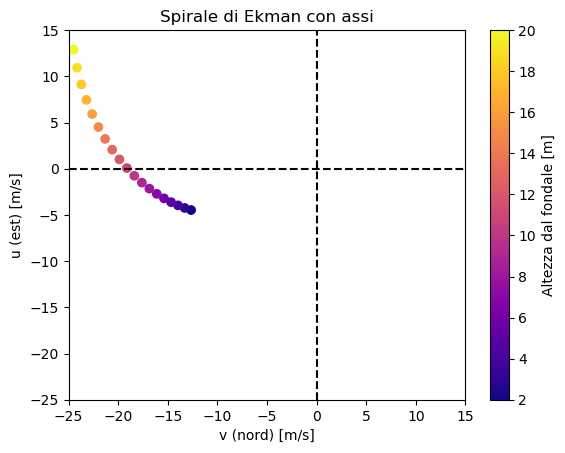

In [43]:
fig3 = plt.scatter(v,u,c=profondità,cmap='plasma')
plt.xlim(-25,15)
plt.ylim(-25,15)
plt.colorbar(label='Altezza dal fondale [m]')
plt.xlabel('v (nord) [m/s]')
plt.ylabel('u (est) [m/s]')
plt.title('Spirale di Ekman con assi')
# Disegna gli assi tratteggiati
plt.plot([0, 0], [-25, 15], 'k--')  # Asse y
plt.plot([-25, 15], [0, 0], 'k--')  # Asse x

In questo caso l'andamento dei dati risulta essere più chiaro: è evidente che avvicinandosi all'origine degli assi, il modulo della corrente diminuisce, mentre aumenta allontanandosi dal fondale.

### Statistica Bayesiana e ottimizzazione
Si assuma che la velocita’ di corrente osservata sia caratterizzata da un errore
di misura gaussiano di 0.5 m/s. Vincolare lo spazio dei parametri del posterior
multidimensionale di (𝛕, d, Φ, ug, vg) con l’algoritmo emcee. Graficare le
velocita’ N e E in funzione della profondita’ z assieme alla predizione teorica.

Per generare l'errore di misura richiesto dal testo è necessario che venga generato un set di valori con distribuzione gaussiana centrata nell'origine e con deviazione standard pari a 0.5. Per fare questo si introduce quindi il pacchetto _scipy_ di cui si utilizza il modulo _stats_. In particolare si utilizza la distribuzione _norm_ che permette di selezionare una serie di dati da una distribuzione gaussiana con valore di aspettazione e deviazione standard richiesti.  


In [142]:
from scipy import stats
errori = stats.norm.rvs(loc=0,scale=0.5, size=38) 
print(errori)



[ 0.15611547 -0.16382293 -0.17067404 -1.01370549  0.26144269 -0.93661367
 -0.42426118  0.89542589 -0.84224969  0.4046051   0.01676048 -0.15146222
 -0.23225487 -0.09318551  0.29884266 -1.01482465  0.12202933  0.93007386
 -0.42470397  0.44334861 -0.32762468 -0.06881677  0.67190635 -0.3033257
 -0.57149899 -0.89963096  0.30020881  0.31296624 -0.27669963 -1.00038656
 -0.06798677  0.72732282  0.35707388 -0.38117133  0.49759369  0.01997289
  0.37223031 -0.19145155]


L'equazione di Bayes 
$$
P(A|B)= \frac{P(B|A)P(A)}{P(B)}
$$
descrive come cambia la probabilità di un evento A dato l'evento B. Sostituendo ad _A_ i parametri _p_ di un certo modello _M_ e a _B_ i dati osservati _d_, l'equazione diventa:
$$
P(p|dM)=\frac{P(d|pM)P(p|M)}{P(d|M)}
$$
Perciò la probabilità che i parametri abbiano determinati valori in base al modello usato e ai dati raccolti, detta Posterior, è proporzionale alla Likelihood, la quale fornisce la probabilità di osservare i dati considerando l'ipotesi corretta, per la Prior, che invece rappresenta le conoscenze a priori che si hanno sui parametri considerando il modello. 

Si definiscono quindi:
* Un _modello_ costituito dalle equazioni che descrivono le velocità delle correnti e dipendente dai parametri da stimare.
* Una _prior_ logaritmica, che permette di sfruttare successivamente le proprietà di somma dei logaritmi; è inoltre costante poichè non si conoscono le distribuzioni dei singoli parametri. In particolare è stato richiesto che i parametri soddisfassero la condizione di positività per _d_ e l'appartenenza ad un angolo giro che accettasse anche valori negativi per $\phi$. Inizialmente si era imposto anche un limite superiore per lo  strato di Ekman, ma esso sembrava essere restrittivo per la stima poi effettuata da _minimize_. Per gli altri parametri non sono state aggiunte condizioni per mancanza di informazioni a priori. 
* Una _likelihood_ logaritmica rappresentata da una distribuzione gaussiana. Non avendo informazioni precise sulla distribuzione dei dati, si è assunta quella gaussiana; questa ipotesi può essere verificata in quanto, creando un istogramma con tutti i dati presenti nel DataFrame _data_, si può notare una distribuzione che ricorda quella presa in ipotesi. Avendo inoltre due set di dati, uno per la componente media Est della velocità e uno per quella Nord, si avrà una matrice di covarianza di dimensioni [38,38]. Assumendo le misure indipendenti fra loro, il coefficiente di correlazione è stato posto pari a zero, creando così una matrice che presenta sulla diagonale le varie varianze. Si definisce inoltre _residuals_ che rappresenta gli scarti fra i dati osservati e il modello teorico.
* Una _posterior_ logaritmica che sarà quindi rappresentata, secondo l'equazione di Bayes applicata al caso, come la somma della 'log_prior' con la 'log_likelihood'. 

In [143]:
theta =np.mean(data['Mean Wind Direction'])

def modello(parameters):
    tau, d, phi, ug, vg = parameters 
    Tx = tau*np.cos(theta)
    Ty = tau*np.sin(theta)
    u = ug + np.sqrt(2)/(rho*f*d) * np.exp(z/d)*(Tx*np.cos(z/d -phi)-Ty*np.sin(z/d - phi))
    v = vg + np.sqrt(2)/(rho*f*d) * np.exp(z/d)*(Tx*np.sin(z/d -phi)+Ty*np.cos(z/d - phi))
    return np.concatenate([u,v])

def log_prior(parameters):
    tau, d, phi, ug, vg = parameters # è il vettore dei parametri
    if d>0 and -np.pi<=phi<np.pi: 
        return 1.0 # serve per l'accettabilità  quando poi deve minimizzare
    return -np.inf

def log_likelihood(parameters,componenti_est,componenti_nord,errori):
    tau, d, phi, ug, vg = parameters # è il vettore dei parametri
    val_teorici_mod = modello(parameters)  #theo1 e theo2
   
    Tcov = np.eye(38)*errori**2
    iTcov = np.linalg.inv(Tcov) # inversa di Tcov
 
    val_oss = np.concatenate([componenti_est, componenti_nord])
    residuals = np.array(val_oss - val_teorici_mod).T   # HO MESSO LA TRASPOSTA QUI 
    
    p,_ = Tcov.shape # prende p =38 e serve dopo 
    #Compute values
    lognormalization = -0.5*(p*np.log(2 * np.pi) +np.log(np.linalg.det(Tcov)))
    exponent = -0.5 * np.sum(residuals@iTcov*residuals)

    return np.nansum(lognormalization + exponent )  

def posterior(parameters,componenti_est,componenti_nord,errori):
    if not np.isfinite(log_prior(parameters)):
        return -np.inf
    return log_prior(parameters) + log_likelihood(parameters,componenti_est,componenti_nord,errori)

In [144]:
tau = -8.0
d = 16.0
phi = -0.55 #radianti
ug = -1.0
vg = -6.0
parameters = [tau,d,phi,ug,vg]
# vengono ora eseguiti dei print che permettono di controllare che non ci siano
# stati problemi nella definzione dei vari elementi
print(log_likelihood(parameters,componenti_est,componenti_nord,errori))
print(log_prior(parameters))
print(posterior(parameters,componenti_est,componenti_nord,errori))

-948853.1364731871
1.0
-948852.1364731871


L'obiettivo è quello di trovare i parametri che ottimizzano il modello teorico che si sta cercando. Questo è reso possibile attraverso _minimize_ del modulo di _scipy.optimize_. Il metodo che interessa è quello del Maximum Likelihood, per cui la miglior stima dei parametri è quella che massimizza la probabilità di avere il campione di dati ottenuto, e quindi la funzione di Likelihood. Per fare questo bisogna quindi richiedere che _minimize_ minimizzi il -_posterior_. Successivamente si forniscono dei valori iniziali da cui l'algoritmo inizierà la ricerca dei parametri ottimizzatori. Gli argomenti di _minimize_ sono quindi la funzione da minimizzare, i valori di partenza ed eventuali parametri che invece non devono essere minimizzati ma essere tenuti costanti, che sono quelli dei dati osservati e degli errori. 'soln' racchiude quindi tutte le informazioni trovate nell'ottimizzazione; in particolar modo è interessante analizzare i dati del best fit, che sono contenuti in 'soln.x'.

In [145]:
from scipy.optimize import minimize

nll = lambda *args: -posterior(*args)
initial = np.array([tau,d,phi,ug,vg]) # punto di partenza 
soln = minimize(nll, initial, args=(componenti_est,componenti_nord,errori)) 
tau_bf, d_bf, phi_bf, ug_bf, vg_bf = soln.x # parametri per il best fit
print(soln.x)
print(log_likelihood(soln.x,componenti_est,componenti_nord,errori))

C:\Users\User\anaconda3\envs\JupiterNotebook\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\User\anaconda3\envs\JupiterNotebook\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\User\anaconda3\envs\JupiterNotebook\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[ 0.29655782  8.49831657 -0.72254952 -2.75024699  1.44547769]
-218.12599503645592


Infine è stato richiesto di stampare la nuova 'log_likelihood' calcolata con i parametri ottimali in modo tale da poter avere un confronto diretto con quella precedente. Se la nuova 'log_likelihood' è maggiore di quella precedente allora la massimizzazione (Maximum Likelihood) è avvenuta correttamente. 

In [94]:
#!pip install emcee

In [95]:
#!pip install tqdm

Si utilizza ora l'algoritmo emcee, implementazione del campionamento Markov Chain Monte Carlo, che permetterà poi di studiare l'interferenza statistica. Si definiscono quindi dei 'walkers' che avranno il compito di esplorare lo spazio dei parametri in modo casuale ma in modo dipendente, per evitare di rimanere bloccati in minimi locali. Per le posizioni iniziali di questi walkers vengono date quelle trovate precedentemente da _minimize_; a queste viene applicata una piccola perturbazione e una deviazione casuale, data da _np.random.radn_, affinchè i walkers vengano distribuiti in maniera più ottimale nello spazio e perchè si possano evitare eventuali correlazioni.  
In seguito si applica l'algoritmo emcee che ha come argomenti il numero di walkers, le loro posizioni iniziali, la funzione di probabilità da campionare e eventuali argomenti che devono rimanere invariati.

In [146]:
import emcee 

n_param = len(parameters)
pos = soln.x * (1+1e-4 * np.random.randn(32 ,n_param)) 
# 32 indica il nuemero di walkers scelti
nwalkers, ndim = pos.shape 

sampler = emcee.EnsembleSampler(nwalkers, ndim, posterior, args=(componenti_est,componenti_nord,errori))
sampler.run_mcmc(pos, 5000, progress=True);
# quest'ultima riga esegue l'algoritmo di MCMC per un numero di passi scelto, 5000
# per ogni camminatore

100%|██████████| 5000/5000 [00:39<00:00, 126.14it/s]


Per vedere e analizzare il risultato dell'algoritmo, è possibile costruire il seguente grafico che mostra il campionamento dei singoli walkers nello spazio dei vari parametri.

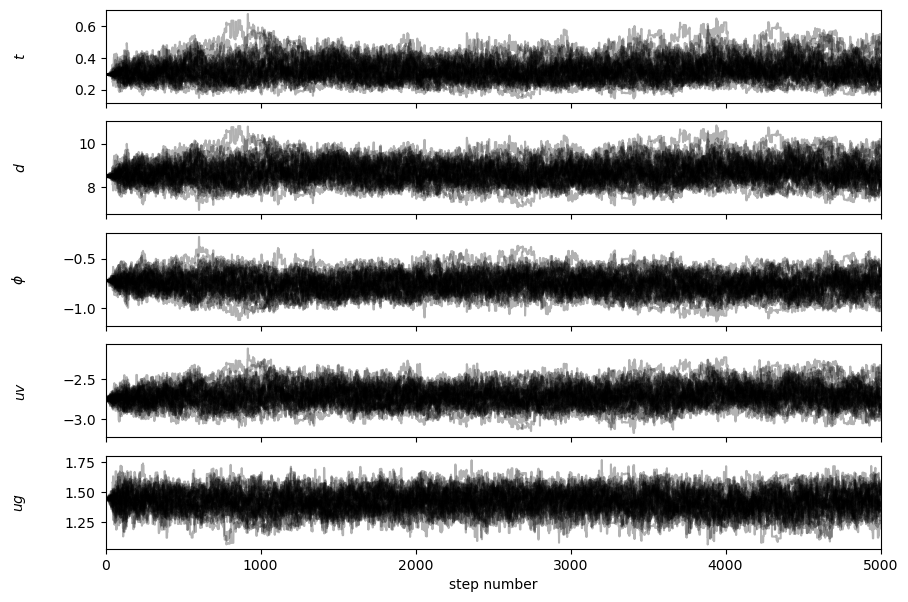

In [147]:
fig, axes = plt.subplots(5, figsize=(10, 7), sharex=True)
# get_chain() restituisce la catena di Markov generata durante il campionamento
samples = sampler.get_chain()
labels = ["$t$","$d$","$\phi$","$uv$","$ug$","$vg$"] #imposto le etichette dei parametri
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In questo caso specifico si può notare come i walkers siano rimasti vicini al punto di minimo individuato inizialmente. Sull'asse delle ordinate si può notare come l'oscillazione passi dall'essere molto precisa per il parametro $\tau$ ad avere invece un intervallo più ampio come nel caso di _d_.  
All'inizio della catena si può notare un periodo di "burn-in" che poi permette di raggiungere una distribuzione stazionaria che converge al valore centrale. Il periodo di burn-in può dipendere dalla posizione iniziale che viene fornita ad _emcee_ per iniziare il campionamento dello spazio dei parametri. L'importante è che poi questi dati vengano successivamente scartati per lo studio delle interferenze statistiche, questo è quello che viene fatto nella seguente riga di codice: 

In [148]:
flat_samples = sampler.get_chain(discard=1000, flat=True)

In [99]:
#!pip install pygtc

Attraverso _pygtc_ è possibile vedere le distribuzioni congiunte e marginali per i vari parametri. Le prime vengono mostrate attraverso le ellissi di confidenza, che evidenziano la probabilità di trovare i parametri entro specifici intervalli simutaneamente, mentre le seconde mostrano la distribuzione di ciascun parametro preso singolarmente.

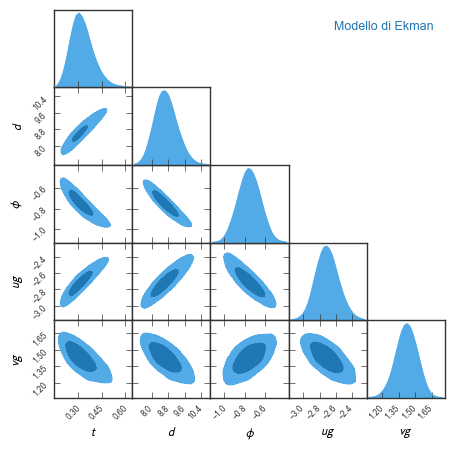

In [149]:
import pygtc
GTC = pygtc.plotGTC(chains=flat_samples,
                    paramNames=['$t$','$d$','$\phi$','$ug$','$vg$'],
                    chainLabels=['Modello di Ekman'],
                    figureSize='MNRAS_page')

Si vogliono ora confrontare i dati osservativi con quelli previsti dal modello teorico. Inizialmente si va a definire il numero di campioni che si vuole utilizzare per il calcolo del modello teorico. Poichè si vuole graficare l'andamento dei dati in funzione dell'altezza rispetto al fondale marino _z_ (sull'asse delle ascisse), si definisce _zarr_ su cui il modello teorico andrà a trovare i rispettivi valori stimati, corrispondenti a 'yarr_est' e 'yarr_nord', attraverso l'implemento del ciclo for.

In [153]:
#questo dovrebbe servire con i valori teorici
print(flat_samples.shape)
Nsamples = 100
zarr = np.linspace(min(z),max(z),200)
yarr_est = np.zeros((200,Nsamples))
yarr_nord = np.zeros((200,Nsamples))
for i in range(Nsamples):
    parameters = flat_samples[np.random.randint(len(flat_samples[:,0])),:]
    Tx = parameters[0]*np.cos(theta)
    Ty = parameters[0]*np.sin(theta)
    yarr_est[:,i] = parameters[3] + np.sqrt(2)/(rho*f*parameters[1]) * np.exp(zarr/parameters[1])*(Tx*np.cos(zarr/parameters[1] - parameters[2])-Ty*np.sin(zarr/parameters[1] - parameters[2]))
    yarr_nord[:,i] = parameters[4] + np.sqrt(2)/(rho*f*parameters[1]) * np.exp(zarr/parameters[1])*(Tx*np.sin(zarr/parameters[1] - parameters[2])+Ty*np.cos(zarr/parameters[1] - parameters[2]))   

(128000, 5)


L'obiettivo finale è quello di comprendere se i dati osservati rientrano in un intervallo di confidenza del 68% rispetto a quelli teorici. Per fare questo ci si serve di _np.percentile_ che calcola il percentile specificato per ogni riga (axis=1) dell'array richiesto. Il comando 'fill_between' va a riempire lo spazio fra il sedicesimo e l'ottantaquattresimo percentile, graficando così l'intervallo di confidenza richiesto.

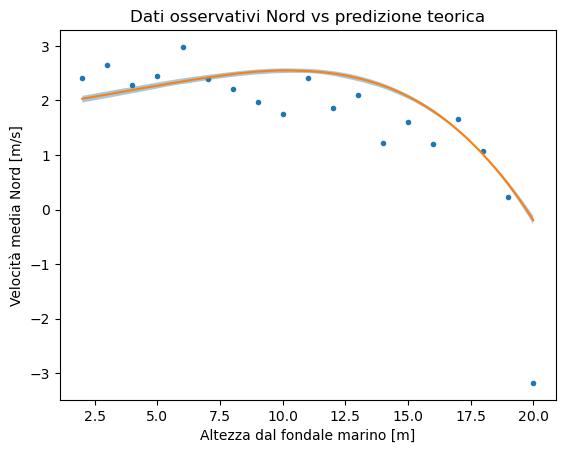

In [154]:
plt.plot(z,componenti_nord,'.')
plt.title('Dati osservativi Nord vs predizione teorica')
plt.xlabel('Altezza dal fondale marino [m]')
plt.ylabel('Velocità media Nord [m/s]')
plt.plot(zarr,np.percentile(yarr_nord,50,axis=1))
plt.fill_between(zarr,np.percentile(yarr_nord,16,axis=1),np.percentile(yarr_nord,84,axis=1),alpha=0.4)

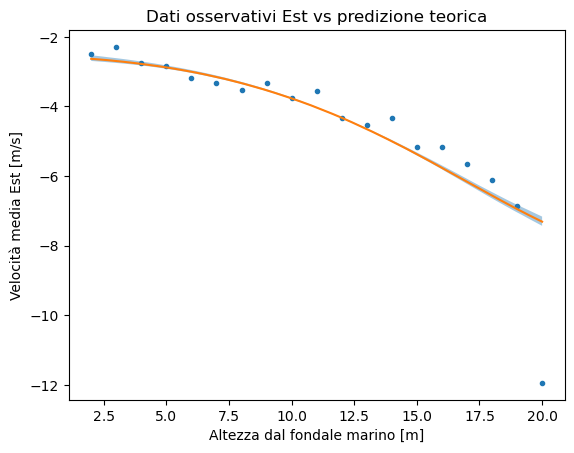

In [155]:
plt.plot(z,componenti_est,'.')
plt.title('Dati osservativi Est vs predizione teorica')
plt.xlabel('Altezza dal fondale marino [m]')
plt.ylabel('Velocità media Est [m/s]')
plt.plot(zarr,np.percentile(yarr_est,50,axis=1))
plt.fill_between(zarr,np.percentile(yarr_est,16,axis=1),np.percentile(yarr_est,84,axis=1),alpha=0.4)

Entrambi gli andamenti non rappresentano molto bene i dati osservativi, in particolare quello delle velocità lungo Nord. Inoltre, un dato osservativo che si discosta molto è quello preso all'altezza di 20m. Quest'ultimo, essendo più vicino alla superficie risentirà molto di più del vento rispetto ai punti sottostanti. Le velocità lungo Nord osservative presentano inoltre alcuni picchi di intensità più alta, aspetto evidente anche nel grafico inziale dove si rappresenta il vettore corrente a diverse profondità.  
Per migliorare i fit si può lavorare sul modello teorico, considerando delle possibili modifiche delle equazioni del modello in base alle condizioni in cui sono state eseguite le misurazioni o implementando una prior che dia qualche condizione in più sui parametri. Questo è possibile dopo numerose osservazioni che permettono di comprendere l'intervallo più usuale per determinati parametri o la loro distribuzione. Si può inoltre implementare un doppio algoritmo emcee, cosicchè i parametri stimati dal primo possano essere utilizzati come punto di partenza per il secondo, dando quindi informazioni sempre più dettagliate sui minimi della funzione.  